Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.


In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In [1]:
# Dependencies 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline
sns.set()

In [2]:
# Import raw data
df_fand = pd.read_csv('fandango_score_comparison.csv', usecols = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'])
df_rate = pd.read_csv('movie_ratings_16_17.csv', usecols = ['movie', 'year', 'fandango'])

In [3]:
df_fand.describe()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000
mean,4.089041,3.845205,3848.787671,0.243836
std,0.540386,0.502831,6357.778617,0.152665
min,3.000000,2.700000,35.000000,0.000000
25%,3.500000,3.500000,222.250000,0.100000
50%,4.000000,3.900000,1446.000000,0.200000
75%,4.500000,4.200000,4439.500000,0.400000
max,5.000000,4.800000,34846.000000,0.500000


In [4]:
df_rate.describe()

,year,fandango
count,214.000000,214.000000
mean,2016.107477,3.894860
std,0.310444,0.516781
min,2016.000000,2.500000
25%,2016.000000,3.500000
50%,2016.000000,4.000000
75%,2016.000000,4.500000
max,2017.000000,5.000000


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
The movie must have had tickets on sale in 2015.
The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

The movie must have been released in 2016 or later.
The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).
This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

**Changing the Goal of our Analysis**

At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

In [5]:
df_rate.sample(10, random_state = 88)

,movie,year,fandango
147,Snowden,2016,4.0
128,Our Kind of Traitor,2016,3.5
116,Moonlight,2016,4.0
183,The Last Word,2017,3.5
60,Get a Job,2016,3.0
184,The Legend of Tarzan,2016,4.5
192,The Purge: Election Year,2016,4.0
69,Hidden Figures,2016,5.0
150,Storks,2016,4.5
170,The Darkness,2016,2.5


In [6]:
# Check there are no entries with < 30 votes
sum(df_fand['Fandango_votes'] < 30)

0

In [7]:
# Extract year of release
df_fand['Year'] = df_fand['FILM'].str[-5: -1].astype(int)
df_fand['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [8]:
df_rate['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [10]:
# New datasets for analysis
df_15 = df_fand[df_fand['Year'] == 2015].copy()
df_16 = df_rate[df_rate['year'] == 2016].copy()

df_15['Year'].value_counts()
df_16['year'].value_counts()

2016    191
Name: year, dtype: int64

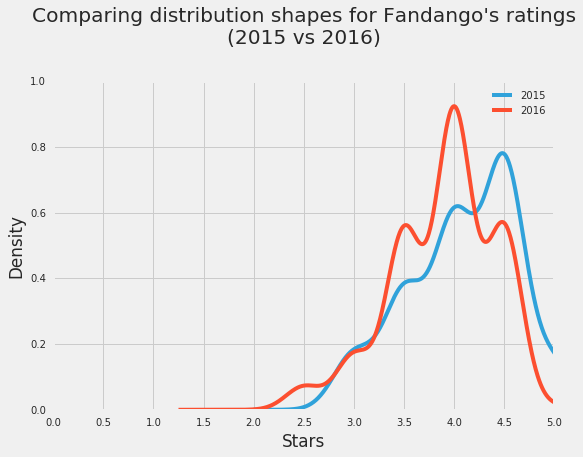

In [22]:
# KDE Plots of datasets
plt.style.use('fivethirtyeight')

df_15['Fandango_Stars'].plot.kde(label = '2015')
df_16['fandango'].plot.kde(label = '2016')

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)", y = 1.1, x = 0.5)
plt.legend()
plt.xlabel('Stars')
plt.xlim(0, 5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show();

- Both distributions are strongly left skewed.
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.
- The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further — ideally in a separate project, since this is quite irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

In [31]:
print('----2015----')
round(df_15['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100,1)

----2015----


3.0     8.5
3.5    17.8
4.0    28.7
4.5    38.0
5.0     7.0
Name: Fandango_Stars, dtype: float64

In [32]:
print('----2016----')
round(df_16['fandango'].value_counts(normalize = True).sort_index() * 100,1)

----2016----


2.5     3.1
3.0     7.3
3.5    24.1
4.0    40.3
4.5    24.6
5.0     0.5
Name: fandango, dtype: float64

- In 2016 - 4.5 and 5 stars had significantly lower percentages compared to 2015. 
- In 2016 - under 1% of the movies had a rating of 5 stars, compared to 2015 when the percentage was close to 7%. 
- Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.
- The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.
- There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 

3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

In [46]:
# Direction of change
df_change = pd.DataFrame()
df_change['2015'] = df_15['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100
df_change['2016'] = df_16['fandango'].value_counts(normalize = True) *100
df_change['change'] = df_change['2016'] - df_change['2015']

df_change.round(1)

,2015,2016,change
3.0,8.5,7.3,-1.2
3.5,17.8,24.1,6.3
4.0,28.7,40.3,11.6
4.5,38.0,24.6,-13.4
5.0,7.0,0.5,-6.5


**Conclusion**

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.